# Aim
More data points 4000, 5000, 6000

In [17]:
print('hi')

hi


In [18]:
import sys
sys.path

['/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/Varying Time Length',
 '/home/eag190/miniconda3/envs/simulations/lib/python39.zip',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/lib-dynload',
 '',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages',
 '/cache/home/eag190/ECD_control',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages/quantum_optimal_control-0.1.0-py3.9.egg']

In [19]:
%matplotlib inline
import os
import sys
import inspect
import numpy as np
from scipy.special import factorial
import h5py

#data_path = '/data'     ... data path specified later
#data_path
#initial_pulse = '../pulses/example_pulses/transmon_cat_initial_pulse.h5'
from h5py import File
import matplotlib.pyplot as plt
from pylab import*
from qutip import*

from scipy import interpolate
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


In [20]:
from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape
from quantum_optimal_control import*

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Storage

In [22]:
import pandas as pd

In [23]:
fname = 'grape_fids_g0_g1.csv'

In [24]:
columns=['time', 'rep fid']
df = pd.read_csv(fname)
# pd.DataFrame([[None for i in range(len(columns))]],columns=columns)
# df.to_csv(fname, index=False)
# df

In [25]:
df

,time,rep fid
0,100,0.088758
1,200,0.264683
2,300,0.365052
3,400,0.393774
4,500,0.428209
5,600,0.462795
6,700,0.488118
7,800,0.502765
8,900,0.517057
9,1000,0.530837


$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# Multimode circle grape

In [26]:
#TODO: Figure out why relative import doesn't work
from circle_grape_v3 import *

In [27]:
transmon_levels = 2

Fixed Parameters

In [28]:
# chi = Peak splitting MHz
chis = 2*array([-33.1962]) 
kappas  = array([0])
states_forbidden_list = []

mode = 1
mode_levels = 15
chi, kappa= chis[mode-1]*1e-6, kappas[mode-1]*1e-6
circle_grape_params = {"chis":[chi],"kappas":[kappa],"alpha":30.0,"delta_c":0}
convergence = {'rate': 0.1, 'update_step': 10, 'max_iterations': 500,
               'conv_target': 3e-4, 'learning_rate_decay': 500.0}


#steps  = 600  


In [29]:
def main(times, fname = fname, df = df):
    '''
    Vary time length, get fidelity
    '''
    for time in times: 
        print(time)
        #param
        initial_guess = None
        steps =1000 #number of points over the total time where amplitudes will be specified
        total_time = time
        reg_coeffs = {'dwdt': 0.1, 'd2wdt2': 1.0e-3, 'forbid_dressed': False,
                      'states_forbidden_list':states_forbidden_list,
                      'forbidden_coeff_list': [1.0*steps] * len(states_forbidden_list)}

        
        
        #class
        op = multimode_circle_grape_optimal_control(mode_state_num = mode_levels,
                                                number_of_modes = 1,hparams = circle_grape_params,add_disp_kerr=False)
        ss = op.run_optimal_control(state_transfer = True, initial_states = [0], target_states = [1], 
                            total_time = total_time, steps = steps,max_amp = 1e-3, 
                            taylor_terms = None,is_dressed=False, 
                            convergence = convergence, reg_coeffs =  reg_coeffs,
                            plot_only_g = True,
                            states_forbidden_list = states_forbidden_list,initial_guess = initial_guess, 
                            file_name="g0_to_g1_circlgrape", data_path=data_path, save = True)
        hf = op.openfile()
        fid  = 1 - hf['error'][-1]
        df_new = pd.DataFrame([[time, fid]], columns=columns)
        if df is None : 
            df = df_new
        else:
            df = df.append(df_new, ignore_index = True)
        df.to_csv(fname, index=False)

In [32]:
times = [8000]

data saved at: /home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data/00022_g0_to_g1_circlgrape.h5


/tmp/ipykernel_69224/2328233095.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_new, ignore_index = True)


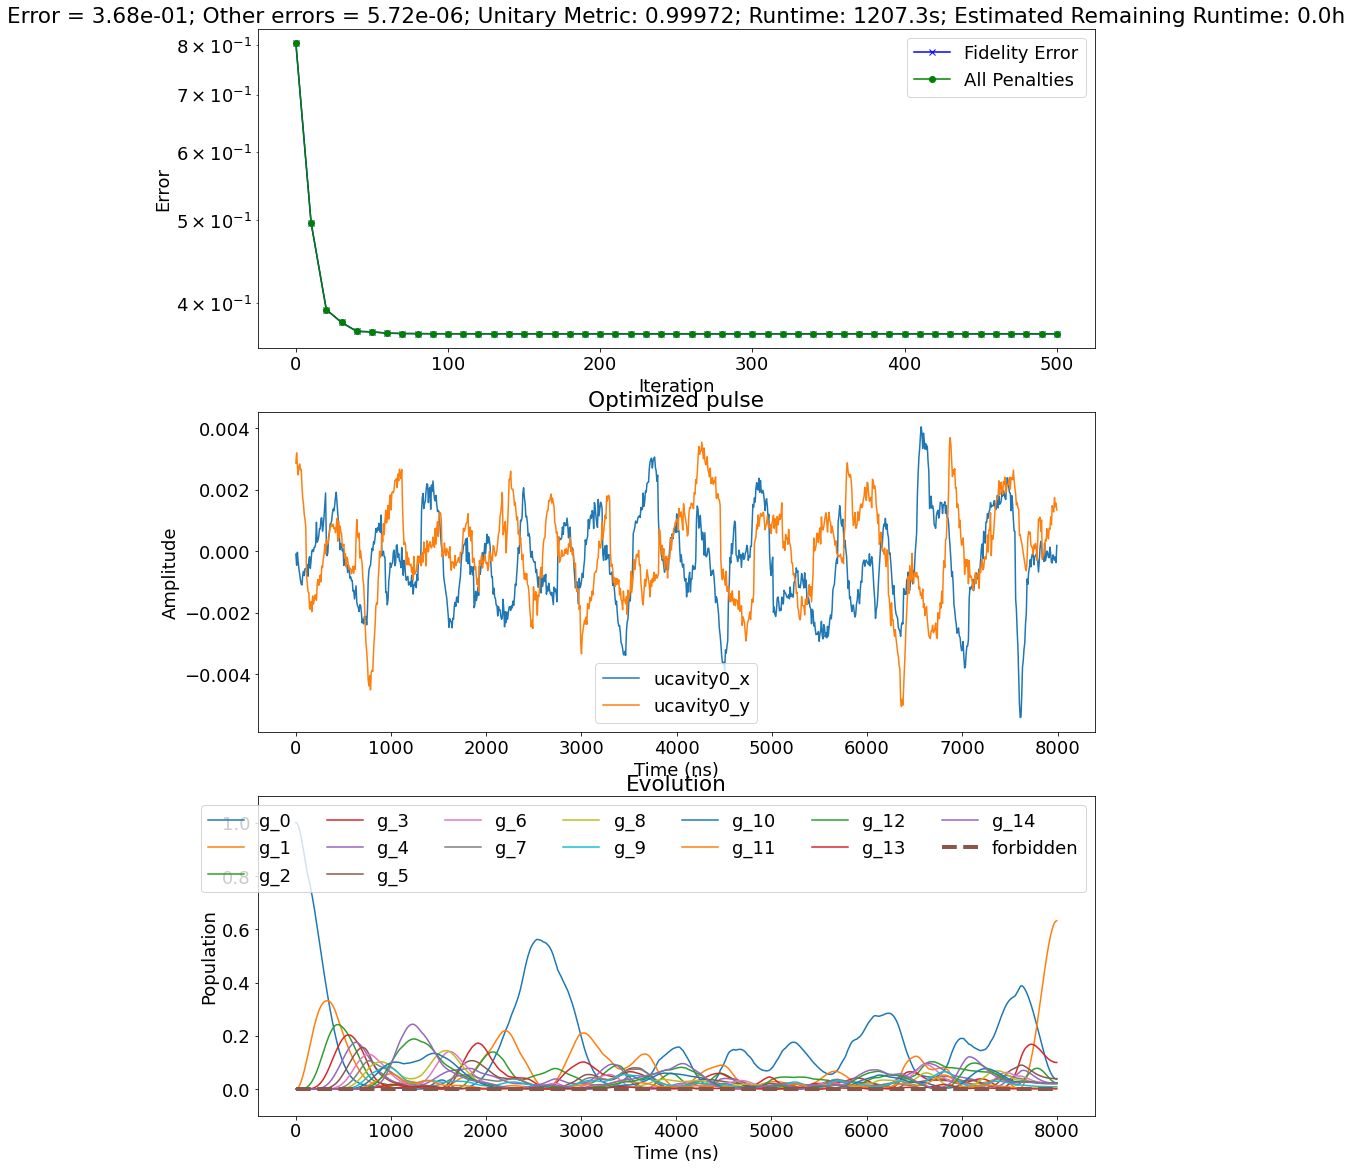

In [33]:
main(times)